In [89]:
import pandas as pd
df= pd.read_excel('/Users/seanyoo/Desktop/youtube_statistic_project /csv file-relatedChannel/Tem/related_channel-DYHUuJAle8A.xlsx')


In [90]:
# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [91]:
# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seanyoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/seanyoo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Preprocessing


In [92]:
#Check if there is any null value 
df.isnull().any()

Channel_name                False
Contacted/Not Contacted      True
Channel_id                  False
Subscribers                 False
Views                       False
Total_videos                False
Categories                  False
Keywords                     True
dtype: bool

In [93]:
df = df.fillna(" ")
df.isnull().any()

Channel_name                False
Contacted/Not Contacted     False
Channel_id                  False
Subscribers                 False
Views                       False
Total_videos                False
Categories                  False
Keywords                    False
dtype: bool

In [94]:
df.dtypes

Channel_name                object
Contacted/Not Contacted     object
Channel_id                  object
Subscribers                  int64
Views                        int64
Total_videos                 int64
Categories                  object
Keywords                    object
dtype: object

In [95]:
df["Average_View"] = df["Views"]//df["Total_videos"]
df = df.sort_values(by='Average_View', ascending=False)
df['Average_View(M)'] = (df['Average_View']/1000000).round(2)
df

,Channel_name,Contacted/Not Contacted,Channel_id,Subscribers,Views,Total_videos,Categories,Keywords,Average_View,Average_View(M)
2,FailArmy,,UCPDis9pjXuqyI7RYLJ-TTSA,16500000,3013114664,431,"['Humour', 'Entertainment', 'Film', 'Lifestyle...","['failarmy', '""fail', 'army""', 'fails', '""fail...",6990985,6.99
16,Man + River,,UCV-KFx9A6HD7gZ3FoMNzt7g,4900000,469524815,150,"['Lifestyle_(sociology)', 'Hobby', 'Technology']","['""man', '+', 'river""', '""river', 'treasure""',...",3130165,3.13
10,Yes Theory,,UCvK4bOhULCpmLabd2pDMtnA,8380000,1005451830,375,['Lifestyle_(sociology)'],"['""Yes', 'Theory""', 'Millennials', '""Generatio...",2681204,2.68
21,Mike Boyd,,UCIRiWCPZoUyZDbydIqitHtQ,3010000,445828585,174,"['Lifestyle_(sociology)', 'Hobby']","['mike', 'boyd', 'michael', '""learn', 'to""', '...",2562233,2.56
3,TKOR,,UC1zZE_kJ8rQHgLTVfobLi_g,12400000,3390284021,1549,"['Lifestyle_(sociology)', 'Hobby', 'Entertainm...","['""Grant', 'Thompson""', '""the', 'king', 'of', ...",2188692,2.19
...,...,...,...,...,...,...,...,...,...,...
74,AirtimeFPV,not Related,UCVIUphdbCR6o-9HpJHKVE0w,304,27092,84,"['Lifestyle_(sociology)', 'Hobby']",,322,0.00
79,BORN FPV,not Related,UCwHEX1fBZUK8YB9C2OZEiZw,233,14450,48,"['Hobby', 'Lifestyle_(sociology)']","['drone', 'racingdrone', '드론', '프리스타일', 'juicy...",301,0.00
80,Chubs,not Related,UCysmbmjtZ469FQS1TTHSPfg,202,15669,63,"['Vehicle', 'Lifestyle_(sociology)', 'Motorspo...","['FPV', '""FPV', 'DRONE""', 'DRONE']",248,0.00
84,PRyan FPV,not Related,UCdCpoLuupWChwLYFgVpVOXA,152,19411,86,"['Hobby', 'Lifestyle_(sociology)']",['FPV'],225,0.00


## Data Visualization 

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (10).

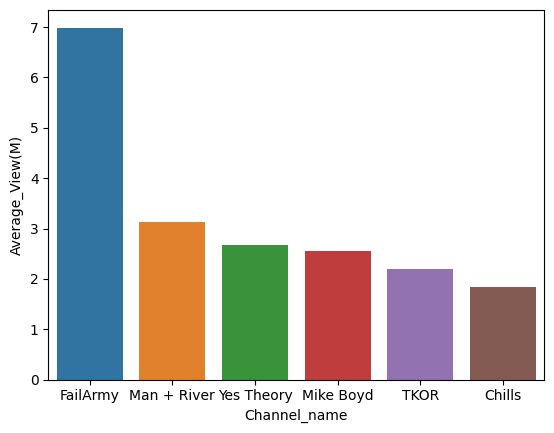

In [96]:
channel_bar_graph = sns.barplot(x = 'Channel_name', y = 'Average_View(M)', data = df.sort_values('Average_View(M)', ascending=False)[0:10])
plot = channel_bar_graph.set_xticklabels(ax.get_xticklabels(), rotation=90)

## WorldCloud


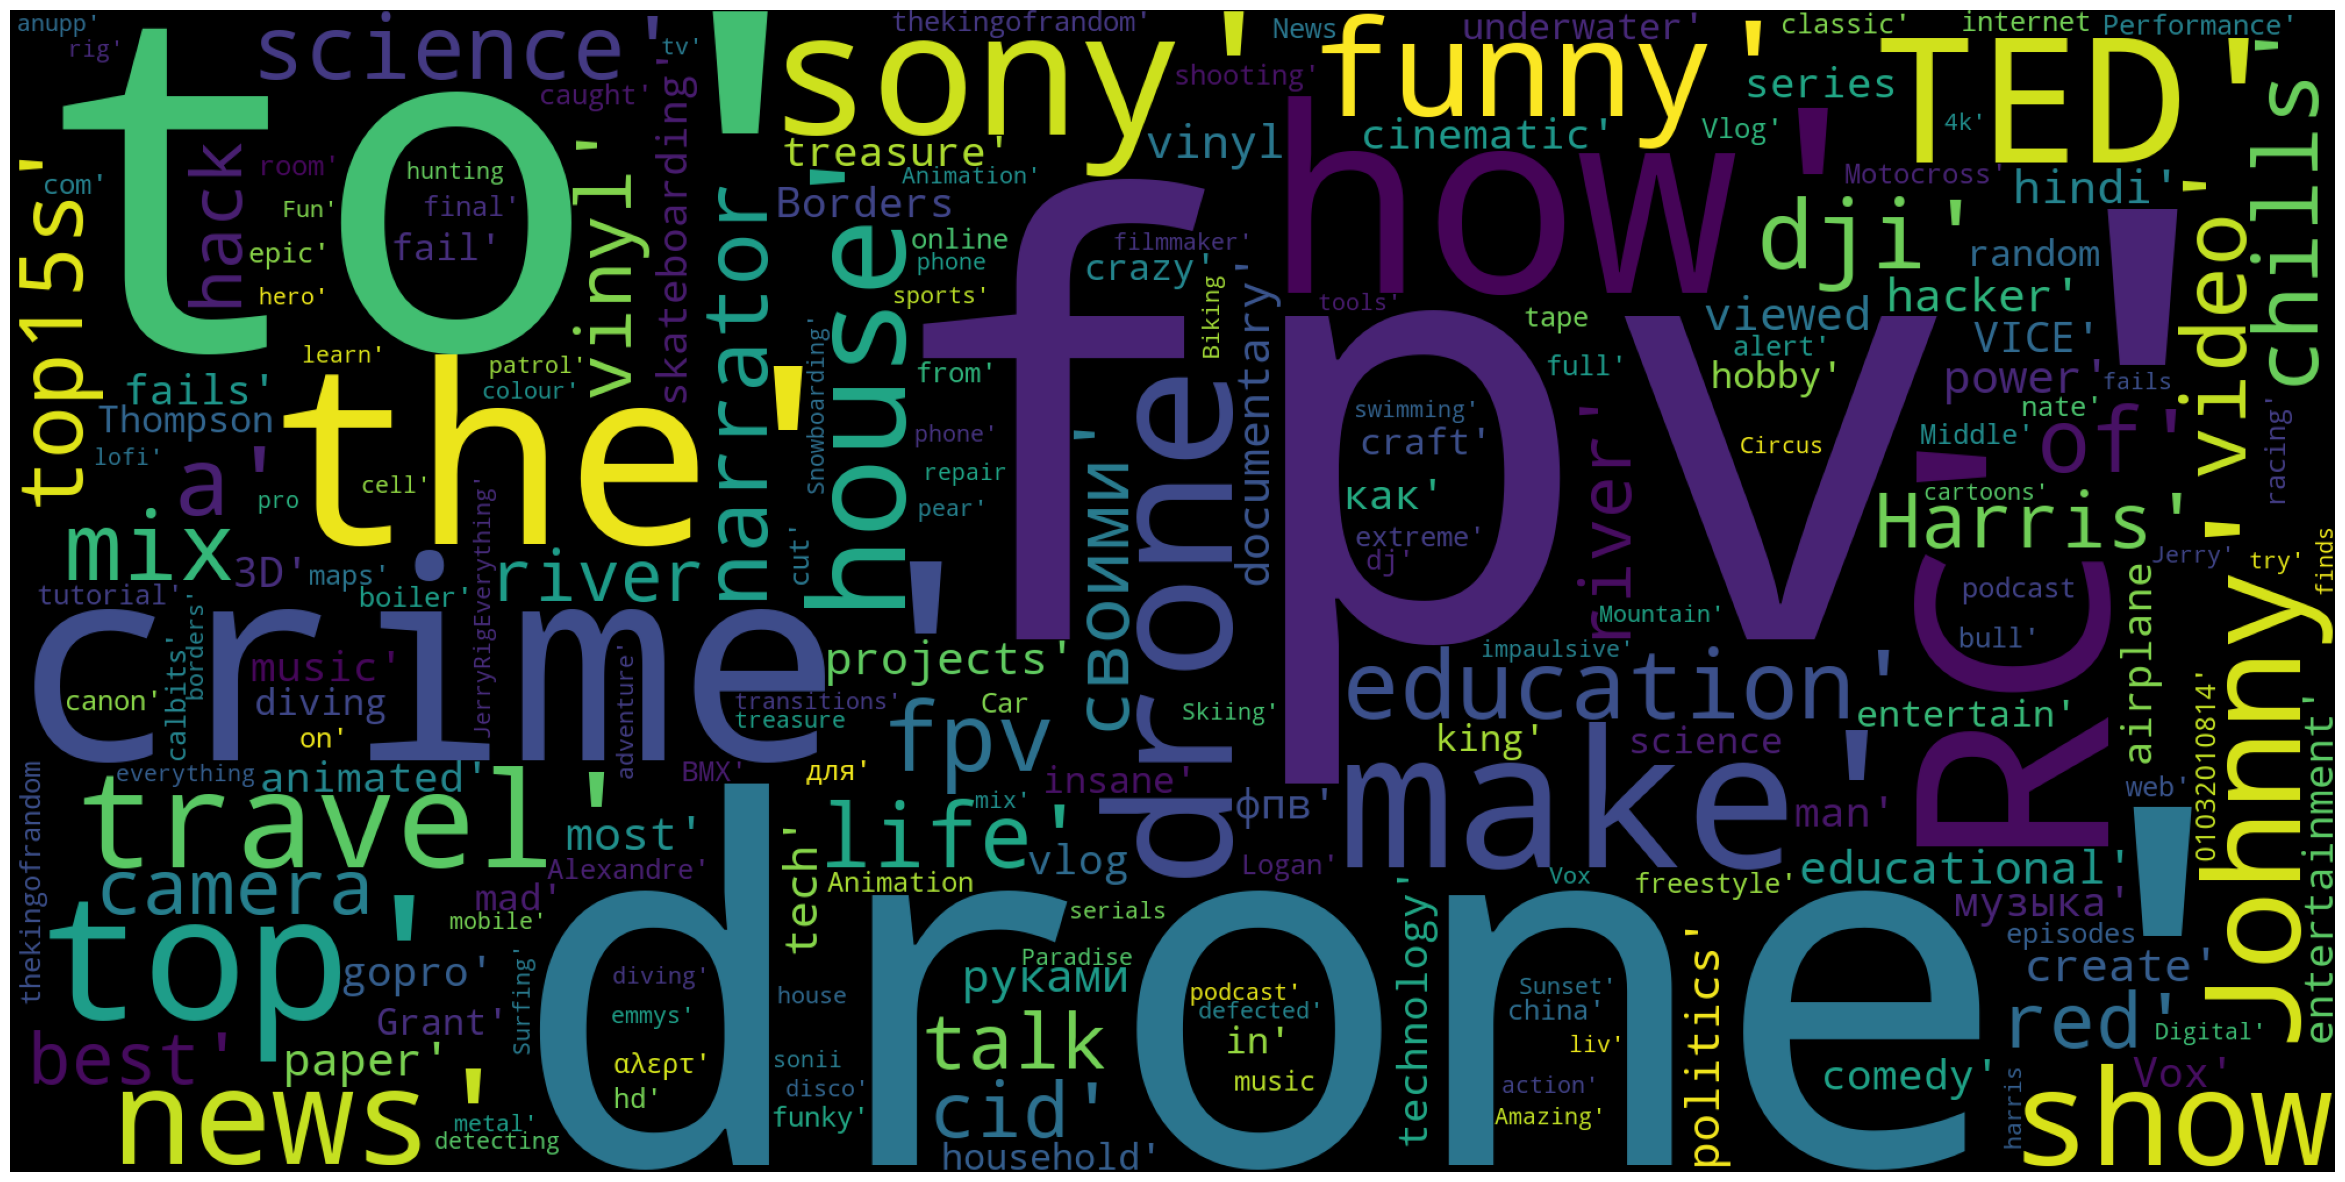

In [97]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['Keywords'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

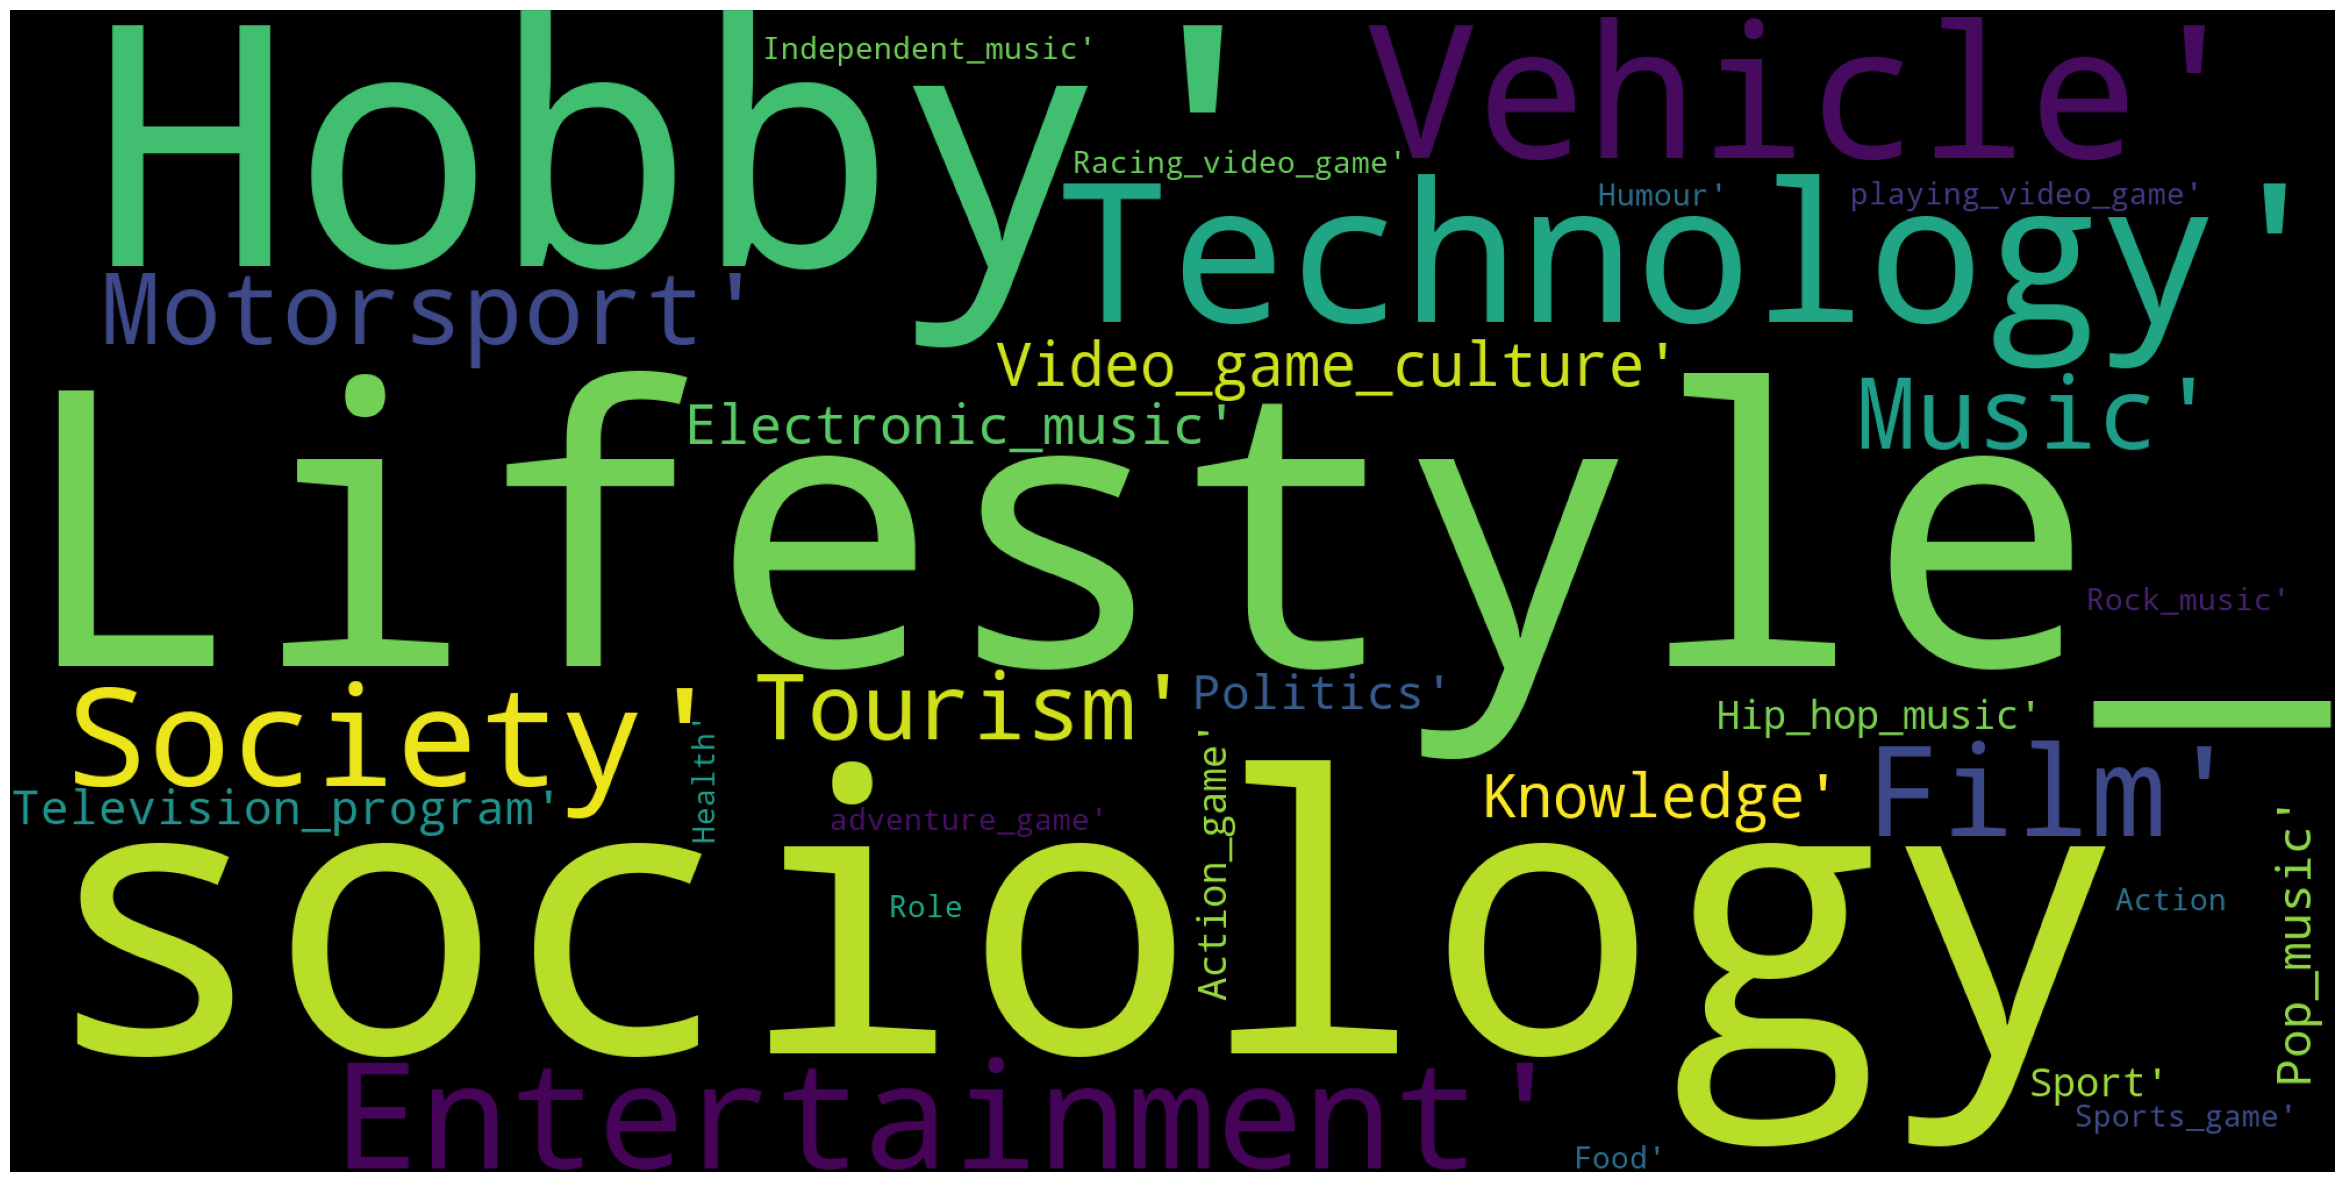

In [98]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['Categories'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)